In [15]:
import numpy as np
import pandas as pd
from typing import List, Dict
import seaborn as sns


In [3]:
results = [{'scores': {'Other_precision': np.array(0.91510755, dtype=np.float32), 'Other_recall': np.array(0.44939229), 'Other_f1': np.array(0.60277656), 'CG_precision': np.array(0.30787462, dtype=np.float32), 'CG_recall': np.array(0.75299766), 'CG_f1': np.array(0.43705861), 'CST_precision': np.array(0.4787555, dtype=np.float32), 'CST_recall': np.array(0.56601337), 'CST_f1': np.array(0.5187452), 'FX_precision': np.array(0.09847616, dtype=np.float32), 'FX_recall': np.array(0.51765719), 'FX_f1': np.array(0.16548711), 'CC_precision': np.array(0.42467678, dtype=np.float32), 'CC_recall': np.array(0.82420943), 'CC_f1': np.array(0.56053914), 'Avg_prec_tracts': np.array(0.32744578, dtype=np.float32), 'Avg_recall_tracts': np.array(0.66521941), 'Avg_f1_tracts': np.array(0.42045752)}}, {'scores': {'Other_precision': np.array(0.9360456, dtype=np.float32), 'Other_recall': np.array(0.73353733), 'Other_f1': np.array(0.82251113), 'CG_precision': np.array(0.48555586, dtype=np.float32), 'CG_recall': np.array(0.70580626), 'CG_f1': np.array(0.57532547), 'CST_precision': np.array(0.67772686, dtype=np.float32), 'CST_recall': np.array(0.51903746), 'CST_f1': np.array(0.5878646), 'FX_precision': np.array(0.13489361, dtype=np.float32), 'FX_recall': np.array(0.54608096), 'FX_f1': np.array(0.21635683), 'CC_precision': np.array(0.6686289, dtype=np.float32), 'CC_recall': np.array(0.80269953), 'CC_f1': np.array(0.72955763), 'Avg_prec_tracts': np.array(0.4917013, dtype=np.float32), 'Avg_recall_tracts': np.array(0.64340605), 'Avg_f1_tracts': np.array(0.52727613)}}]

In [17]:
import pandas as pd
from typing import List, Dict

def save_results(
    results: List[Dict],
    subject_id: str,
    uncertainty_measure: str,
    background_bias: bool,
    feature: bool,
    save_dir: str
):
    # Initialize an empty list to store the structured data
    data = []

    # Iterate through the list to process each result
    for iteration, result in enumerate(results):
        scores = result['scores']
        for key, value in scores.items():
            parts = key.split('_')
            region = parts[0]
            score_type = parts[1] if len(parts) == 2 else parts[1] + "_" + parts[2] # Handle the _tracts case
            data.append({
                'iteration': iteration,
                'region': region,
                'score_type': score_type.replace('_tracts', ''),
                'score': value.item(),  # Convert numpy array to Python scalar
                'subject_id': subject_id,
                'uncertainty_measure': uncertainty_measure, 
                'background_bias': background_bias,
                'feature': feature                        
            })

    # Convert the structured data into a pandas DataFrame
    df = pd.DataFrame(data)
    save_name = f"{subject_id}_{uncertainty_measure}_bb-{background_bias}_tta-{tta}.csv"
    df.to_csv(save_dir + save_name, index=False)

In [19]:
subject_id = "1234"
uncertainty_measure = "entropy"
background_bias = True
tta = False
save_dir = "../../results/data/"

save_results(results, subject_id, uncertainty_measure, background_bias, tta, save_dir)

In [12]:
import numpy as np
import pandas as pd

# Sample data
results = [{'scores': {'Other_precision': np.array(0.91510755, dtype=np.float32), 'Other_recall': np.array(0.44939229), 'Other_f1': np.array(0.60277656), 'CG_precision': np.array(0.30787462, dtype=np.float32), 'CG_recall': np.array(0.75299766), 'CG_f1': np.array(0.43705861), 'CST_precision': np.array(0.4787555, dtype=np.float32), 'CST_recall': np.array(0.56601337), 'CST_f1': np.array(0.5187452), 'FX_precision': np.array(0.09847616, dtype=np.float32), 'FX_recall': np.array(0.51765719), 'FX_f1': np.array(0.16548711), 'CC_precision': np.array(0.42467678, dtype=np.float32), 'CC_recall': np.array(0.82420943), 'CC_f1': np.array(0.56053914), 'Avg_prec_tracts': np.array(0.32744578, dtype=np.float32), 'Avg_recall_tracts': np.array(0.66521941), 'Avg_f1_tracts': np.array(0.42045752)}},
           {'scores': {'Other_precision': np.array(0.9360456, dtype=np.float32), 'Other_recall': np.array(0.73353733), 'Other_f1': np.array(0.82251113), 'CG_precision': np.array(0.48555586, dtype=np.float32), 'CG_recall': np.array(0.70580626), 'CG_f1': np.array(0.57532547), 'CST_precision': np.array(0.67772686, dtype=np.float32), 'CST_recall': np.array(0.51903746), 'CST_f1': np.array(0.5878646), 'FX_precision': np.array(0.13489361, dtype=np.float32), 'FX_recall': np.array(0.54608096), 'FX_f1': np.array(0.21635683), 'CC_precision': np.array(0.6686289, dtype=np.float32), 'CC_recall': np.array(0.80269953), 'CC_f1': np.array(0.72955763), 'Avg_prec_tracts': np.array(0.4917013, dtype=np.float32), 'Avg_recall_tracts': np.array(0.64340605), 'Avg_f1_tracts': np.array(0.52727613)}}]

# Initialize an empty list to store the structured data
data = []

# Iterate through the list to process each result
for iteration, result in enumerate(results):
    scores = result['scores']
    for key, value in scores.items():
        parts = key.split('_')
        region = parts[0]
        score_type = parts[1] if len(parts) == 2 else parts[1] + "_" + parts[2] # Handle the _tracts case
        data.append({
            'iteration': iteration,
            'region': region,
            'score_type': score_type.replace('_tracts', ''),
            'score': value.item()  # Convert numpy array to Python scalar
        })

# Convert the structured data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame


<Axes: xlabel='iteration', ylabel='score'>

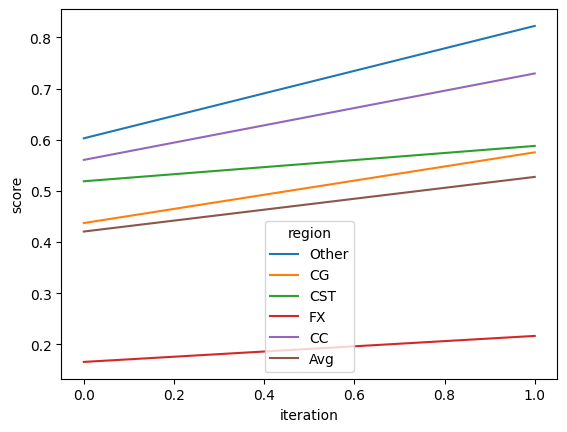

In [11]:
import seaborn as sns

sns.lineplot(data=df[df['score_type'] == 'f1'], x='iteration', y='score', hue='region')

In [5]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("../../results/data/709551_set1_entropy_bb-True_default.csv")

<Axes: xlabel='iteration', ylabel='score'>

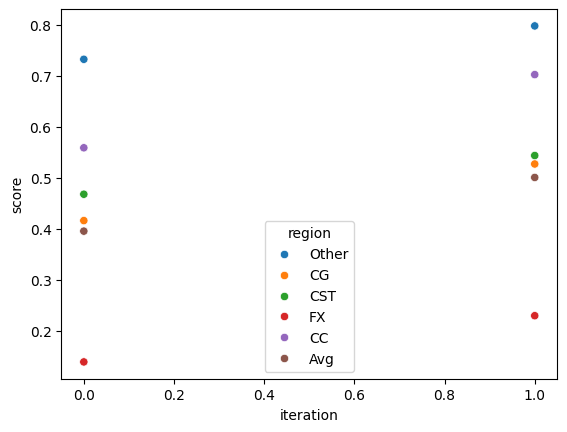

In [8]:
sns.scatterplot(data=df[df['score_type'] == 'f1'], x='iteration', y='score', hue='region')